In [1]:
import pandas as pd #數據分析、資料讀取
import numpy as np #資料、函式處理
from scipy import stats
from scipy.stats import norm, skew
from math import ceil #ceil()函數將數字無條件上入整數

#繪製圖表
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 資料匯入
利用import進去的pandas，來做資料的讀取及匯入。

In [2]:
#匯入train.csv及test.csv
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [3]:
df_train.head() #顯示train頭五筆資料

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head() #顯示test頭五筆資料

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#檢查訓練集有幾個features
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#查看df_train 及 df_test 的shape(矩陣、數組維數)
print("df_train: {} "  .format(df_train.shape))
print("df_test: {} " .format(df_test.shape))

df_train: (1460, 81) 
df_test: (1459, 80) 


In [7]:
df_train['SalePrice'].describe() #訓練集中的 SalePrice描述統計

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

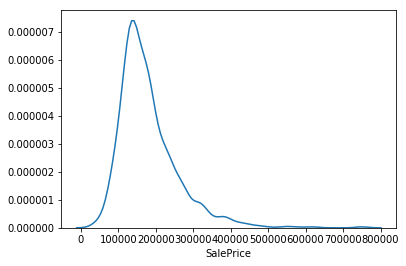

In [8]:
sns.distplot(df_train['SalePrice'],hist=False,rug=False)
#繪製distplot直線圖
#hist = True/False 開關直方圖
#rug = True/False 開關rug細條

distplot及其他繪製圖詳介
https://hk.saowen.com/a/4a5ecabd9d56a7df9ab3154f54092ac2b6f4ffb0669e8c60e75b6df2af191dd5

In [9]:
#印出SalePrice的偏態系數(Skewness)及峰態係數(Kurtosis)
print("偏態係數(Skewness): %f" % df_train['SalePrice'].skew())
print("峰態係數(Kurtosis): %f" % df_train['SalePrice'].kurt())

偏態係數(Skewness): 1.882876
峰態係數(Kurtosis): 6.536282


由上述資料可得知，<br>
偏態係數>0，所以平均數>中位數，表示有少數幾筆資料很大。<br>
峰態係數>0，故為高峻峰。較常態分佈來得高瘦<br>

偏態係數及峰態係數解析：<br>
http://estat.ncku.edu.tw/topic/desc_stat/base/Skewness.html <br>
http://estat.ncku.edu.tw/topic/desc_stat/base/Kurtosis.html <br>

# 資料前處理

In [10]:
#將Id欄位刪除，因不影響測試結果
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

In [11]:
# 從測試集以及訓練集中找出缺失值

# 訓練集
count_nans = len(df_train) - df_train.count()
df_count_nans = count_nans.to_frame()
df_count_nans.columns=["train_nan_count"]
df_count_nans["%_train_nans"]=(df_count_nans["train_nan_count"]/df_train.shape[0]) * 100

# 測試集
df_count_nans["test_nan_count"] = len(df_test) - df_test.count()
df_count_nans["%_test_nans"]=(df_count_nans["test_nan_count"]/df_test.shape[0]) * 100

df_count_nans.sort_values("train_nan_count", ascending=False, inplace=True)
df_count_nans.query('train_nan_count > 0 or test_nan_count > 0')

,train_nan_count,%_train_nans,test_nan_count,%_test_nans
PoolQC,1453,99.520548,1456.0,99.794380
MiscFeature,1406,96.301370,1408.0,96.504455
Alley,1369,93.767123,1352.0,92.666210
Fence,1179,80.753425,1169.0,80.123372
FireplaceQu,690,47.260274,730.0,50.034270
LotFrontage,259,17.739726,227.0,15.558602
GarageYrBlt,81,5.547945,78.0,5.346127
GarageCond,81,5.547945,78.0,5.346127
GarageType,81,5.547945,76.0,5.209047
GarageFinish,81,5.547945,78.0,5.346127


In [12]:
# 在合併測試集與訓練集前將SalePrice先行取出
y_train = df_train.SalePrice.values
print(y_train)
df_train.drop("SalePrice", inplace=True, axis=1)

[208500 181500 223500 ... 266500 142125 147500]


In [13]:
# 合併測試集與訓練集的數值，以便後續的處理
df_all = pd.concat([df_train,df_test])
df_all.reset_index(inplace=True, drop=True)
print(df_all.shape)
df_all.columns
df_all.head()

(2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 缺失值搜尋及處理

In [14]:
cols_with_na = df_all.isnull().sum() #查詢資料缺失比數且相加
cols_with_na = cols_with_na[cols_with_na>0] #顯示缺失值>0的columns
print(cols_with_na.sort_values(ascending=False))

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64


Text(0.5,1,'Percent missing data by feature')

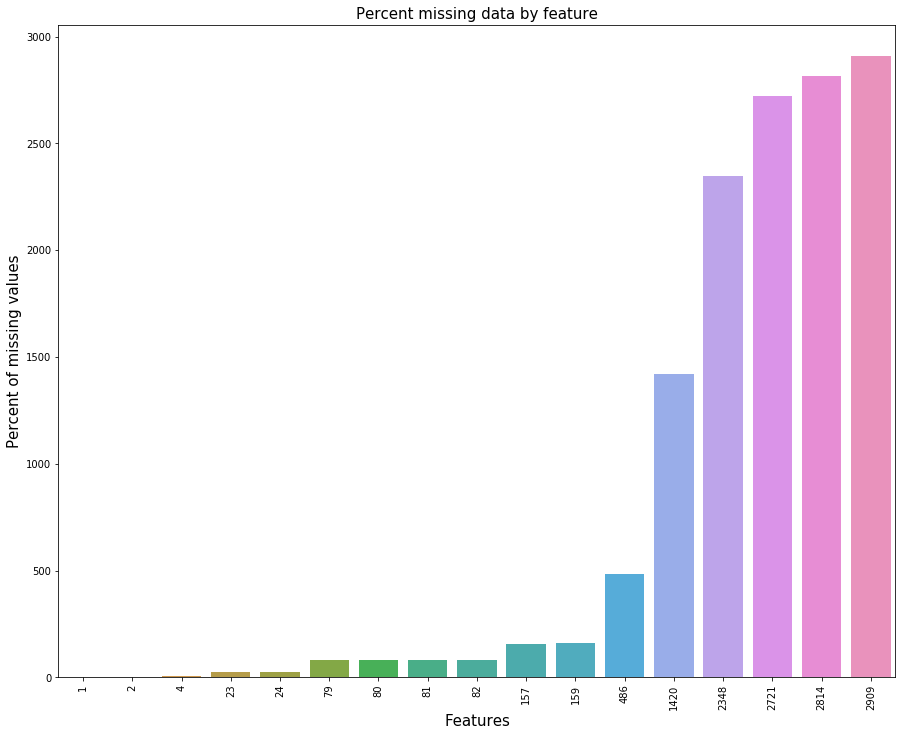

In [15]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=cols_with_na, y=cols_with_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

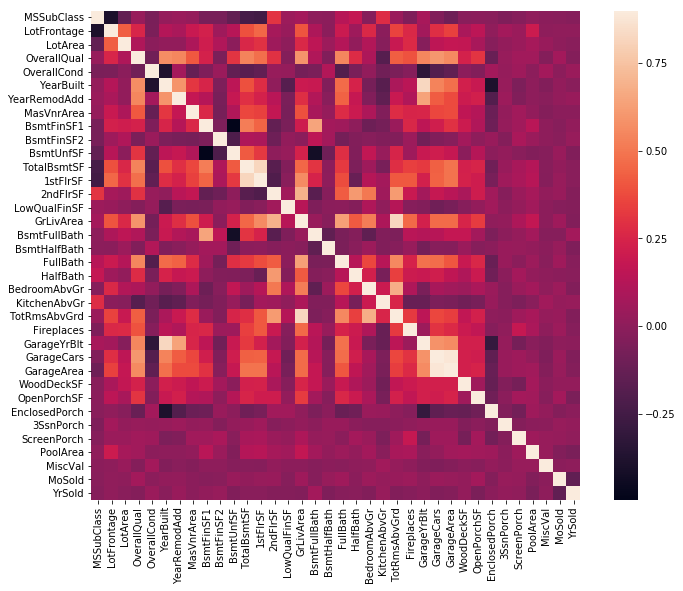

In [16]:
#利用熱力圖查看'SalePrice'與其他特徵值的相關係數#利用熱力圖查看 
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## 定義缺失值

In [17]:
cols_fillna = ['PoolQC', 'Alley', 'MiscFeature', 'Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2']

# 將上述列中的缺失值(NaN)改為None
for col in cols_fillna:
    df_all[col].fillna('None',inplace=True)
    
# MasVnrArea 可能為房子無石造面。所以我們用0代替
df_all.MasVnrArea.fillna(0,inplace=True)

# 將底下六項視為沒有地下室，所以都用0代替。
df_all.BsmtFullBath.fillna(0,inplace=True)
df_all.BsmtHalfBath.fillna(0,inplace=True)
df_all.BsmtFinSF1.fillna(0,inplace=True)
df_all.BsmtFinSF2.fillna(0,inplace=True)
df_all.BsmtUnfSF.fillna(0,inplace=True)
df_all.TotalBsmtSF.fillna(0,inplace=True)

# 以下三項NaN視為沒有車庫，所以都已0代替。
df_all.GarageYrBlt.fillna(0,inplace=True)
df_all.GarageArea.fillna(0,inplace=True)
df_all.GarageCars.fillna(0,inplace=True)

# lotFrontage 按照鄰域，填補所有鄰域的缺失值
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# MSZoning 利用眾數來做代替
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])

# Functional 在資料集敘述Functional中的NA代表Typ，所以直接代替。
df_all["Functional"] = df_all["Functional"].fillna("Typ")

# SaleType 一樣以眾數WD來代替
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

# KitchenQual 只有一個Na值，所以一樣將他以眾數TA代替
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

# Utilities 所有紀錄都為AllPub，除了一個NoSeWa以及2個NA除外，因此該功能無助於預測建模，所以我們可以將它刪除
df_all.drop(['Utilities'], axis=1, inplace=True)

# Exterior1st & 2nd 也都只有一個缺失值，所以一樣都以他們最常見的眾數替換
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])

# Electrical 只有一個缺失值，而此主要功能為SBrkr，所以一樣以此代替
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])
df_all[cols_fillna].head(10)

,PoolQC,Alley,MiscFeature,Fence,MasVnrType,FireplaceQu,GarageQual,GarageCond,GarageFinish,GarageType,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType1,BsmtFinType2
0,None,None,None,None,BrkFace,None,TA,TA,RFn,Attchd,No,TA,Gd,GLQ,Unf
1,None,None,None,None,None,TA,TA,TA,RFn,Attchd,Gd,TA,Gd,ALQ,Unf
2,None,None,None,None,BrkFace,TA,TA,TA,RFn,Attchd,Mn,TA,Gd,GLQ,Unf
3,None,None,None,None,None,Gd,TA,TA,Unf,Detchd,No,Gd,TA,ALQ,Unf
4,None,None,None,None,BrkFace,TA,TA,TA,RFn,Attchd,Av,TA,Gd,GLQ,Unf
5,None,None,Shed,MnPrv,None,None,TA,TA,Unf,Attchd,No,TA,Gd,GLQ,Unf
6,None,None,None,None,Stone,Gd,TA,TA,RFn,Attchd,Av,TA,Ex,GLQ,Unf
7,None,None,Shed,None,Stone,TA,TA,TA,RFn,Attchd,Mn,TA,Gd,ALQ,BLQ
8,None,None,None,None,None,TA,Fa,TA,Unf,Detchd,No,TA,TA,Unf,Unf
9,None,None,None,None,None,TA,Gd,TA,RFn,Attchd,No,TA,TA,GLQ,Unf


In [18]:
#確認所有features是否都無缺失值
df_all_na  = (df_all.isnull().sum() / len(df_all)) * 100
df_all_na = df_all_na.drop(df_all_na[df_all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_all_na})
missing_data.head()

,Missing Ratio


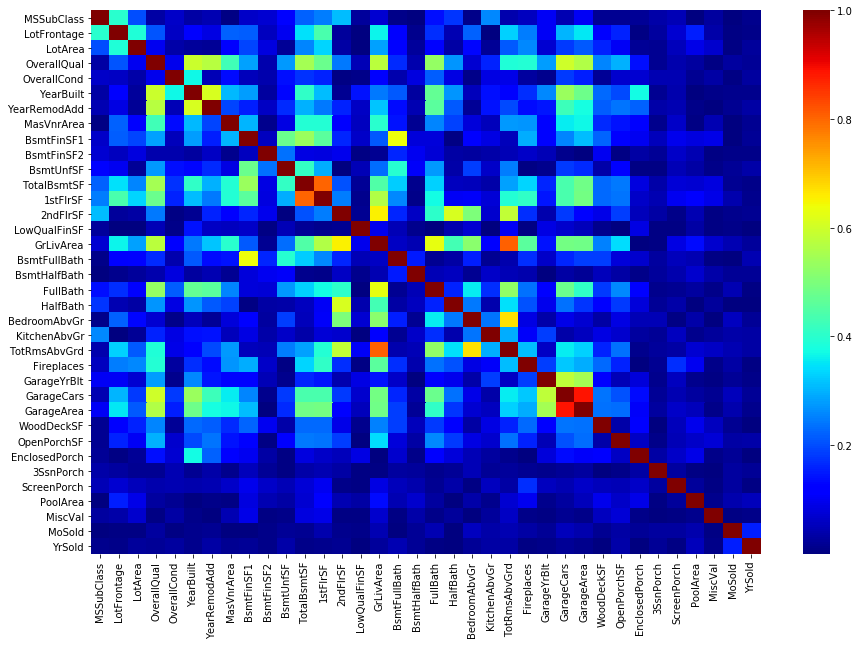

In [19]:
# 藉由合併過後的熱力圖尋找高度相關的features
corr_matrix = df_all.corr().abs()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, cmap="jet")

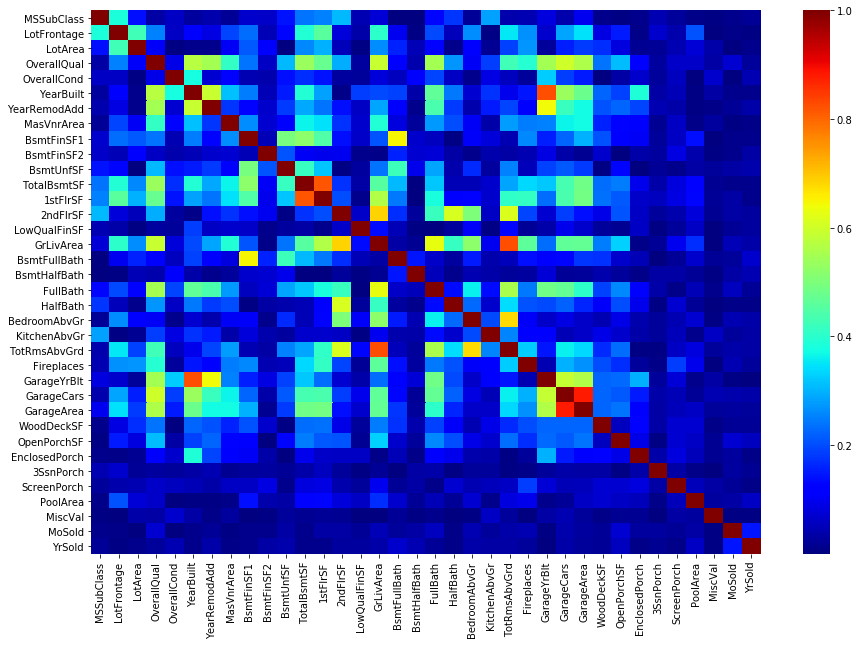

In [20]:
# 訓練集熱力圖
corr_matrix = df_train.corr().abs()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, cmap="jet")

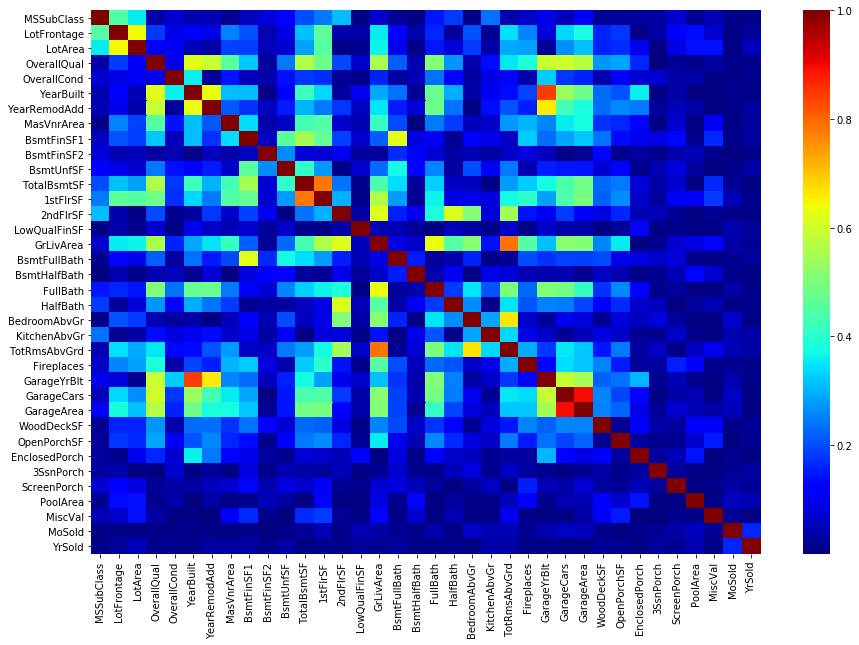

In [21]:
# 測試集熱力圖
corr_matrix = df_test.corr().abs()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, cmap="jet")

In [22]:
# 選擇使用上三角矩陣
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 來找相關性大於等於0.75的Features
to_drop = [column for column in upper.columns if any(upper[column] >= 0.75)]
print(to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']


由以上描述可得四項高相關性的Features<br><br>
而'1stFlrSF'與'TotalBsmtSF'是相關的。因為通常地下室都位於一樓以下，大小相似。<br>
而'TotRmsAbvGrd'和'GrLivArea'是相關的。在這兩個Features中都沒有考慮到地下室。<br>
而'GarageYrBlt'和'YearBlt'具高度相關性。因為車庫大多是在房子建造完時建造的。<br>
而'GarageArea'和'GarageCars'具有很高的相關性。因為如果能夠停更多的車子，那麼車位也會更多。

### 接著將相關係數大於等於0.75的features捨棄

In [23]:
df_all.drop(to_drop, axis=1, inplace=True)

# 離群值

基於從原始的數據資料去做定義，數據中可能會存在異常值。尤其是在GrLivArea欄中，所以我們觀察並將可能的離群值刪除。

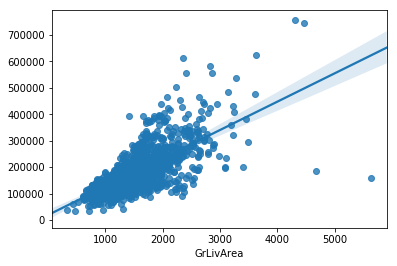

In [24]:
sns.regplot(x=df_train["GrLivArea"], y=y_train)

從上圖我們可以發現，GrLivArea面積右下角有兩點超過4000平方公尺，但售價卻非常低。而像右上角的兩個超過4000平方公尺的點，價格卻是超過70000，所以右下角兩個點即為離群值，應於刪除。否則在建模上，模型會因為要取得這兩點，而造成過度訓練(Overfitting)。

In [25]:
drop_points = df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]["GrLivArea"]
drop_points_list = drop_points.index.tolist()
df_all.drop(drop_points_list, inplace=True)

# 更新刪除離群值後的訓練集數據索引
y_train = np.delete(y_train, drop_points_list)
df_train_last_index=df_train.shape[0]-len(drop_points_list)

# 數據轉換分類

https://www.solver.com/transform-categorical-data

In [26]:
#MSSubClass為建築類別，將其轉換成string
df_all['MSSubClass'] = df_all['MSSubClass'].apply(str)
df_all["MSSubClass"] = LabelEncoder().fit_transform(df_all["MSSubClass"])

# 處理數據中的偏差值

In [27]:
# 檢測有偏差值的索引
skew_thresh = 0.5
skewed = df_all.skew().sort_values(ascending=False)
a=skewed[abs(skewed)>skew_thresh]
a

MiscVal          21.950962
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
EnclosedPorch     4.004404
ScreenPorch       3.947131
BsmtHalfBath      3.932018
MasVnrArea        2.623068
OpenPorchSF       2.530660
WoodDeckSF        1.845741
LotFrontage       1.103332
GrLivArea         1.069300
BsmtFinSF1        0.981149
BsmtUnfSF         0.920161
2ndFlrSF          0.861999
Fireplaces        0.725651
HalfBath          0.697024
TotalBsmtSF       0.672097
BsmtFullBath      0.622735
OverallCond       0.569607
YearBuilt        -0.599503
dtype: float64

根據以上數據，可知數據中有存在偏差數據。利用log將其轉換。

In [28]:
skewed_cols = skewed[abs(skewed)>skew_thresh].index.tolist()
print(len(skewed_cols))
print(skewed_cols)
df_all[skewed_cols] = df_all[skewed_cols].apply(np.log1p)
df_all[skewed_cols].head()

24
['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'Fireplaces', 'HalfBath', 'TotalBsmtSF', 'BsmtFullBath', 'OverallCond', 'YearBuilt']


,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,BsmtHalfBath,...,GrLivArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,Fireplaces,HalfBath,TotalBsmtSF,BsmtFullBath,OverallCond,YearBuilt
0,0.0,0.0,9.042040,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,7.444833,6.561031,5.017280,6.751101,0.000000,0.693147,6.753438,0.693147,1.791759,7.602900
1,0.0,0.0,9.169623,0.0,0.0,0.693147,0.0,0.000000,0.0,0.693147,...,7.141245,6.886532,5.652489,0.000000,0.693147,0.000000,7.141245,0.000000,2.197225,7.589336
2,0.0,0.0,9.328212,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,7.488294,6.188264,6.075346,6.765039,0.693147,0.693147,6.825460,0.693147,1.791759,7.601902
3,0.0,0.0,9.164401,0.0,0.0,0.693147,0.0,5.609472,0.0,0.000000,...,7.448916,5.379897,6.293419,6.629363,0.693147,0.000000,6.629363,0.693147,1.791759,7.557995
4,0.0,0.0,9.565284,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,7.695758,6.486161,6.196444,6.960348,0.693147,0.693147,7.044033,0.693147,1.791759,7.601402


# Onehot-Encoding

In [29]:
# 利用One hot encoder將categorical data 轉換成NumPy(Numerical Python)形式
categorical_data_cols = df_all.select_dtypes(include=['object'])
print(categorical_data_cols.columns.tolist())
df_all = pd.get_dummies(df_all)
df_all = df_all.fillna(df_all.mean())

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# 正規化數據

In [30]:
# 記錄log是因為高房價及低房價的房屋都會影響一樣的結果
y_train = np.log1p(y_train)

在one hot encoding過後，因為數據目前處於不同值，所以必須做正規化。

In [31]:
df_all = (df_all - df_all.mean()) / (df_all.max() - df_all.min())

In [32]:
# 將修改後數據分別創建新的訓練集及測試集
df_tr = df_all.iloc[:df_train_last_index]
df_te = df_all.iloc[df_train_last_index:]
print(df_tr.shape)
print(df_te.shape)

(1458, 295)
(1459, 295)


# 使用回歸演算法
https://ithelp.ithome.com.tw/articles/10187739 <br>

嘗試以下三種算法<br>
彈性網絡(ElasticNet)<br>
https://blog.csdn.net/qq_21904665/article/details/52315642 <br>
多變數線性迴歸(Ridge Regression)<br>
http://ihong-blog.logdown.com/posts/429845-ridge-regression <br>
隨機森林(Random Forest)<br>
https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def _ApplyLinearAlgo(model_obj, df_tr, df_te, y_train):
    model_obj.fit(df_tr, y_train)
    y_predict = model_obj.predict(df_tr)
    print("r2 score train " + str(r2_score(y_train, y_predict)))
    print("rmse score train " + str(mean_squared_error(y_train, y_predict)))

    print(df_tr.shape)
    print(df_te.shape)
    y_te_pred = np.expm1(model_obj.predict(df_te))
    
    return y_te_pred

In [34]:
print("\n")
print("ElasticNetCV")
from sklearn.linear_model import ElasticNetCV
lr = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
y_pred_Elastic = _ApplyLinearAlgo(lr, df_tr, df_te, y_train)

print("\n")
print ("\nRidgeCV")
from sklearn.linear_model import RidgeCV
lr=RidgeCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10])
y_te_Ridge = _ApplyLinearAlgo(lr, df_tr, df_te, y_train)

print("\n")
print("RandomForestRegressor")
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor()
y_te_RF = _ApplyLinearAlgo(lr, df_tr, df_te, y_train)



ElasticNetCV
r2 score train 0.9365948980377066
rmse score train 0.010123306938249362
(1458, 295)
(1459, 295)



RidgeCV
r2 score train 0.9463354576060755
rmse score train 0.008568121768457495
(1458, 295)
(1459, 295)


RandomForestRegressor
r2 score train 0.9762283264060453
rmse score train 0.0037954035366206365
(1458, 295)
(1459, 295)


通過上述三種演算法測試，可得ElasticNet得最佳分數，所以選擇使用他匯出。

# 匯出submission

In [35]:
idx = pd.read_csv("data/test.csv").Id
my_submission = pd.DataFrame({'Id': idx, 'SalePrice': y_pred_Elastic})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)
my_submission.head()

,Id,SalePrice
0,1461,116820.597350
1,1462,155152.969241
2,1463,179377.693529
3,1464,192713.524293
4,1465,196529.451788


## 參考文獻

Overfitting and Regularization - <br>
http://cpmarkchang.logdown.com/posts/193261-machine-learning-overfitting-and-regularization <br>

https://www.kaggle.com/jack89roberts/top-7-using-elasticnet-with-interactions/notebook <br>
https://www.kaggle.com/smehta12/house-values-prediction-top-20 <br>
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard